## Exercise 04.01: Interpretable Machine Learning & Data Mining


Part 1: Learn about Interpretable Decision Sets, and the pyIDS implementation
* pyIDS: https://github.com/jirifilip/pyIDS
* Further details about implementation: http://ceur-ws.org/Vol-2438/paper8.pdf
* Original paper: https://cs.stanford.edu/people/jure/pubs/interpretable-kdd16.pdf

Part 2: Learn about subgroup discovery - the pysubgroup implementation, respectively
* pysubgroup: https://github.com/flemmerich/pysubgroup
* Further details about implementation: https://link.springer.com/chapter/10.1007/978-3-030-10997-4_46

Part 3: Apply pyIDS and pysubgroup
* Use the heart disease dataset: https://www.kaggle.com/ronitf/heart-disease-uci
* Apply preprocessing on the data as needed
* Apply pyIDS, and generate a model regarding the class of the heart disease dataset.Visualize the model/print the "final rules"
* Apply pysubgroup (with a suitable quality function, e.g., the ChiSquaredQF); for subgroup discovery, you might need to discretize numeric attributes; also, you might need a minimal support threshold (e.g., 5% of the instances); result is a list of the top-k (k=10, k=20) subgroups
* Compare the results of pyIDS and pysubgroup. Which similarities and differences do you observe? (Write a short text about this, max half a Din A4 page)

/var/folders/wj/mnwh7fsj34q68bm63b5hvh_00000gn/T/ipykernel_3134/3874987334.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"][i] = str(int(data["age"][i]/5)*5) + " to " + str(int(data["age"][i]/5)*5+4)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/wj/mnwh7fsj34q68bm63b5hvh_00000gn/T/ipykernel_3134/3874987334.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

IDSRule {thalach=130 to 139,trestbps=120 to 129} => {target=0} sup: 0.03 conf: 1.00, f1: 0.03, len: 3, id: 466152
IDSRule {thalach=160 to 169,age=40 to 44} => {target=1} sup: 0.03 conf: 1.00, f1: 0.03, len: 3, id: 465593
IDSRule {oldpeak=0.5 to 0.9,thalach=170 to 179} => {target=1} sup: 0.02 conf: 1.00, f1: 0.02, len: 3, id: 465848
IDSRule {thalach=120 to 129,oldpeak=2.5 to 2.9} => {target=0} sup: 0.02 conf: 1.00, f1: 0.02, len: 3, id: 466985
IDSRule {oldpeak=2.0 to 2.4,exang=1} => {target=0} sup: 0.03 conf: 1.00, f1: 0.00, len: 3, id: 466634
IDSRule {age=55 to 59,ca=2} => {target=0} sup: 0.03 conf: 1.00, f1: 0.00, len: 3, id: 465699
IDSRule {thalach=110 to 119,ca=1} => {target=0} sup: 0.02 conf: 1.00, f1: 0.00, len: 3, id: 466862
IDSRule {exang=1,ca=2} => {target=0} sup: 0.06 conf: 1.00, f1: 0.00, len: 3, id: 465690
IDSRule {sex=0,age=45 to 49} => {target=1} sup: 0.03 conf: 1.00, f1: 0.00, len: 3, id: 465883
IDSRule {oldpeak=2.5 to 2.9,cp=0} => {target=0} sup: 0.04 conf: 1.00, f1: 0.0

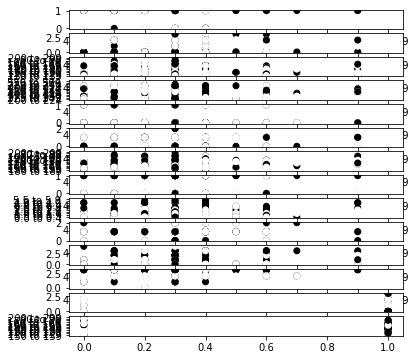

In [142]:
import pandas as pd
from pyids.algorithms.ids_classifier import mine_CARs
from pyids.algorithms.ids import IDS

import matplotlib.pyplot as plt
import itertools

from pyarc.qcba.data_structures import (
    QuantitativeDataFrame,
    QuantitativeCAR
)

class IDSVisualization:

    def __init__(self, ids_clf, quant_dataframe):
        if type(quant_dataframe) != QuantitativeDataFrame:
            raise Exception("type of quant_dataframe must be QuantitativeDataFrame")

        if type(ids_clf) != IDS:
            raise Exception("type of ids_clf must by IDS")

        self.pd_dataframe = quant_dataframe.dataframe
        self.colnames = list(self.pd_dataframe.columns)
        self.colnames_len = len(self.colnames)
        self.colnames_x = self.colnames[:self.colnames_len - 1]
        self.colnames_y = self.colnames[self.colnames_len - 1] 

        self.colnames_x_combinations = list(itertools.combinations(self.colnames_x, 2))


    def visualize_dataframe(self, figsize):
        fig, axes = plt.subplots(self.colnames_len)
        fig.set_size_inches(*figsize)

        for idx, ax in enumerate(axes):
            col_x, col_y = self.colnames_x_combinations[idx]
            
            x = self.pd_dataframe[col_x]
            y = self.pd_dataframe[col_y]
            color = self.pd_dataframe[self.colnames_y].values
            
            ax.scatter(x, y, c=color)

data = pd.read_csv("./heart.csv").sample(frac=1).reset_index(drop=True)
for i in range(len(data["age"])):
    data["age"][i] = str(int(data["age"][i]/5)*5) + " to " + str(int(data["age"][i]/5)*5+4)
    
for i in range(len(data["trestbps"])):
    data["trestbps"][i] = str(int(data["trestbps"][i]/10)*10) + " to " + str(int(data["trestbps"][i]/10)*10+9)
    
for i in range(len(data["chol"])):
    data["chol"][i] = str(int(data["chol"][i]/25)*25) + " to " + str(int(data["chol"][i]/25)*25+24)
    
for i in range(len(data["thalach"])):
    data["thalach"][i] = str(int(data["thalach"][i]/10)*10) + " to " + str(int(data["thalach"][i]/10)*10+9)
    
for i in range(len(data["oldpeak"])):
    data["oldpeak"][i] = str(data["oldpeak"][i]-(data["oldpeak"][i]%0.5)) + " to " + str(data["oldpeak"][i]-(data["oldpeak"][i]%0.5)+0.4)
    
cars = mine_CARs(data, 50)
lambda_array = [1, 1, 1, 1, 1, 1, 1]

quant_dataframe = QuantitativeDataFrame(data)
quant_cars = list(map(QuantitativeCAR, cars))

ids = IDS()
ids.fit(quant_dataframe=quant_dataframe, class_association_rules=cars, lambda_array=lambda_array)
viz = IDSVisualization(ids, quant_dataframe)
viz.visualize_dataframe(figsize=(6, 6))
for rule in ids.clf.rules:
    print(rule)

acc = ids.score(quant_dataframe)
print("overall accuracy is: ", acc)

In [173]:
import pysubgroup as ps
import pandas as pd

data = pd.read_csv("./heart.csv").sample(frac=1).reset_index(drop=True)

for i in range(len(data["age"])):
    data["age"][i] = str(int(data["age"][i]/5)*5) + " to " + str(int(data["age"][i]/5)*5+4)
    
for i in range(len(data["trestbps"])):
    data["trestbps"][i] = str(int(data["trestbps"][i]/10)*10) + " to " + str(int(data["trestbps"][i]/10)*10+9)
    
for i in range(len(data["chol"])):
    data["chol"][i] = str(int(data["chol"][i]/25)*25) + " to " + str(int(data["chol"][i]/25)*25+24)
    
for i in range(len(data["thalach"])):
    data["thalach"][i] = str(int(data["thalach"][i]/10)*10) + " to " + str(int(data["thalach"][i]/10)*10+9)
    
for i in range(len(data["oldpeak"])):
    data["oldpeak"][i] = str(data["oldpeak"][i]-(data["oldpeak"][i]%0.5)) + " to " + str(data["oldpeak"][i]-(data["oldpeak"][i]%0.5)+0.4)
    
target = ps.BinaryTarget(target_attribute="target", target_value=True)
searchspace = ps.create_selectors(data, ignore=['target'])
task = ps.SubgroupDiscoveryTask (
    data, 
    target, 
    searchspace, 
    result_set_size=20, 
    depth=2, 
    qf=ps.WRAccQF())
result = ps.BeamSearch().execute(task)
for quality, rule in result.to_descriptions():
    print("quality: ", quality, "\trule: ", rule)


quality:  0.13420252916380745 	rule:  ca==0 AND exang==0
quality:  0.1336143515341633 	rule:  exang==0 AND thal==2
quality:  0.13175178904029017 	rule:  ca==0 AND thal==2
quality:  0.13070613992092273 	rule:  thal==2
quality:  0.11453125510570858 	rule:  ca==0
quality:  0.11384504787112373 	rule:  fbs==0 AND thal==2
quality:  0.11041401169819952 	rule:  slope==2 AND thal==2
quality:  0.10201614220828019 	rule:  exang==0
quality:  0.10175472992843836 	rule:  exang==0 AND slope==2
quality:  0.10097049308891283 	rule:  ca==0 AND fbs==0
quality:  0.10048034506420939 	rule:  ca==0 AND slope==2
quality:  0.09793157533575138 	rule:  slope==2
quality:  0.09031794268535763 	rule:  exang==0 AND oldpeak=='0.0 to 0.4'
quality:  0.09028526615037741 	rule:  oldpeak=='0.0 to 0.4' AND thal==2
quality:  0.089664411985753 	rule:  restecg==1 AND thal==2
quality:  0.0881612913766624 	rule:  ca==0 AND oldpeak=='0.0 to 0.4'
quality:  0.08649478809267064 	rule:  oldpeak=='0.0 to 0.4'
quality:  0.085743227788

/var/folders/wj/mnwh7fsj34q68bm63b5hvh_00000gn/T/ipykernel_3134/3048555090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"][i] = str(int(data["age"][i]/5)*5) + " to " + str(int(data["age"][i]/5)*5+4)
/var/folders/wj/mnwh7fsj34q68bm63b5hvh_00000gn/T/ipykernel_3134/3048555090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["trestbps"][i] = str(int(data["trestbps"][i]/10)*10) + " to " + str(int(data["trestbps"][i]/10)*10+9)
/var/folders/wj/mnwh7fsj34q68bm63b5hvh_00000gn/T/ipykernel_3134/3048555090.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

### Compare the results of pyIDS and pysubgroup. Which similarities and differences do you observe? (Write a short text about this, max half a Din A4 page)
The first thing that is immediately noticeable is that pyIDS takes significantly longer to calculate than pysubgroup.
In pyIDS the number of cars also has an effect on how many rules are generated. In the case of pysubgroup the number of rules can be specified directly. However, the generated rules themselves are very different from each other. In the case of pysubgroup the category ca seems to play a strong role, whereas in the case of pyIDS no category plays a strong role in its frequency in the rules. Another striking feature is that pyIDS, in contrast to pysubgroup, always creates a rule with two features. The other algorithm is more variable and generates rules with 1 or 2 features. In various other configurations, rules with 3 features have also appeared.


With pysubgroup it is also possible to examine only certain class values and see how rules would change if certain features were not available. To examine classes with more than 2 values it is either not supported or only a limited amount of algorithms to solve the problem can be used.

## Exercise 04.02: Reading/Discussion/Summary

Part 1: Reading:
* Read the following paper: Zanin et al. (2016) "Combining complex networks and data mining: why and how"
* The paper is available here: https://www.sciencedirect.com/science/article/pii/S037015731630062X   <br>
  (It is also available in the "files/exercises" course folder)

Part 2: Think about the following questions:
* What are Complex Networks?
* Why are they useful, in general?
* What are specific challenges in their application?
* What is their relationship to Data Mining, and how can Complex Networks and Data Mining be connected?
* How do exemplary classification approaches work?
* What are some further exemplary techniques to apply?

Part 3: Discussing, Summary
* Prepare answers for these questions for the practical session on November 30, 2021. You will first discuss these in groups, and then we will discuss them in the plenary meeting.
* After that, summarize your findings (and those of the group discussion) in a small report (max. half a Din A4 page). For example, you could write 2-3 sentences for answering a specific question.

# Report 


## What are Complex Networks?

Complex Networks are Network representations of real world systems, which can encompass further metrics, topologies and even further layers, types of links or other additional features. Their goal is to represent systems in a way that makes it easier to analyse understand these systems. 

## Why are they useful, in general?

They are useful because the complexity of some systems can be too great for them to be easily analysed with data mining algorithms or represented by simpler models. The additional features and structure elements of complex systems therefore help with analysing certain systems or making them more understandable to humans. 

## What are specific challenges in their application?

The challenges of applying complex networks include finding relevant features/data, in order to focus on the important parts of systems and reducing the necessary computational power of the analysis. Another challenge is to find the right metrics and to construct the network in such a way, that the system is properly represented. This is even more relevant for functional networks, where the functions have to be choosen correctly aswell. 

## What is their relationship to Data Mining, and how can Complex Networks and Data Mining be connected?

Both data mining and complex networks share similar goals of making systems more understandable and being useful for anlaysing them. Complex Networks are more useful to represent structures and relations between certain elements, whereas data mining algorithms focus more on finding patterns and showing relations between certain features. Complex networks can be used for feature selection for data mining algorithms and there are other useful ways in which they can be combined.

## How do exemplary classification approaches work?

One approach is multiple kernel learning, which shows which parts of a network are most relevant for a certain classification. Another approach is to build a complex network based on an instance and use normal data mining algorithms like SVM to classify the created complex network. 

## What are some further exemplary techniques to apply?

Further techniques are for example link prediction, where Data Mining Algorithms are used to predict which links exist in complex networks, also taking into account their topology. Another technique is to represent features in a Complex Network, which then can be used to find the most important features, which solves the problem of feature selection for Data Mining Algorithms. A further technique is to transform big and heterogenous amounts of data into a complex network structure, this simplifies the data and makes them more homogenous and therefore makes it possible to use them for Data Mining more efficiently. 


## Uploading your solution
For uploading your solution, please upload two files:
* The Jupyter-Notebook file (.ipynb)
* A PDF (printout/file) of the Jupyter notebook file (.pdf)
* IMPORTANT: Please add your name (Example: MartinAtzmueller), as a suffix to the file names, e.g.:<br>
  KBS-Assigment4_MartinAtzmueller.ipynb, KBS-Assignment4_MartinAtzmueller.pdf